In [1]:
# statsmodels.api
# la funcion ols (ordina least square)
# pingoin.anova
# scipy.f_oneway()

In [27]:
import scipy.stats as sc
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson

var1 = np.array([72,65,67,75,62,73])
var2 = np.array([55,59,68,70,53,50])
var3 = np.array([64,74,61,58,51,69])

var = [var1,var2,var3]
#plt.boxplot(var,positions = [1,2,3])
#plt.show()
#sc.f_oneway(var1,var2,var3)

#    supuestos
# 1ro - errores distribucion normal con media 0
# sc.shapiro(var)
# 2do - errores independientes
# durbin_watson(var)

# si d es aprox 2 ent son independientes
# si d es mayor q 4 o menor q 0 no se puede decir



# 3ro - residuos igual varianza
# sc.bartlett(*var)


array([0.03006908, 0.01979973, 0.0038959 , 0.0121679 , 0.00918522,
       0.07069102])

In [21]:
import pandas as pd
data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')
data

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.0,5.25,16,...,2,216,74,6.36,1438.00,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.5,3.26,33,...,6,172,123,4.77,1474.00,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,0.0,3.12,7,...,0,42,132,8.54,1846.00,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,0.0,4.15,4,...,1,22,106,8.19,2308.00,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.5,3.16,22,...,5,108,124,2.92,1208.00,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,Rob Zastryzny*,30,NYM,NL,0,0,0.0,9.00,1,...,0,4,60,1.11,1.00,9.0,0.0,0.0,9.0,0.00
1077,1078,Rob Zastryzny*,30,LAA,AL,0,0,0.0,6.00,5,...,1,12,76,2.78,1.00,6.0,0.0,3.0,6.0,2.00
1078,1079,Angel Zerpa*,22,KCR,AL,2,1,667.0,1.64,3,...,1,44,255,5.75,1091.00,7.4,1.6,2.5,2.5,1.00
1079,1080,T.J. Zeuch,26,CIN,NL,0,3,0.0,15.19,3,...,0,64,31,11.08,2906.00,20.3,4.2,5.9,4.2,0.71


In [26]:
import pandas as pd

# Lee el archivo .csv
data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')

# Selecciona la variable de interés
variable_interes = "BB"

# Encuentra las correlaciones entre la variable de interés y todas las demás variables
correlaciones = data.corr()[variable_interes]

# Selecciona solo las correlaciones que son lineales o monótonas
correlaciones_lineales = correlaciones[(correlaciones > 0.5) | (correlaciones < -0.5)]

# Imprime las correlaciones lineales o monótonas
print(correlaciones_lineales)

W      0.760587
L      0.822310
G      0.508862
GS     0.793709
IP     0.897438
H      0.880808
R      0.894490
ER     0.886945
HR     0.806581
BB     1.000000
SO     0.871770
HBP    0.653036
WP     0.655953
BF     0.912487
Name: BB, dtype: float64


In [33]:
#regresion lineal con python 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')


X = data[["IP","BF"]] # variables independientes
y = data["BB"] # variable dependiente

model = LinearRegression()

def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = LinearRegression()
            selected_features = best_features+[new_column]
            model.fit(X[selected_features], y)
            new_pval[new_column] = f_regression(X[selected_features], y)[1][-1]
        min_pval = new_pval.min()
        if(min_pval<0.05):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
selected_features = forward_selection(X, y)

#entrenando el modelo de regresion
model.fit(X[selected_features], y)   

#realizando predicciones
y_pred = model.predict(X[selected_features])

/tmp/ipykernel_3992308/1572497784.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_3992308/1572497784.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_3992308/1572497784.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


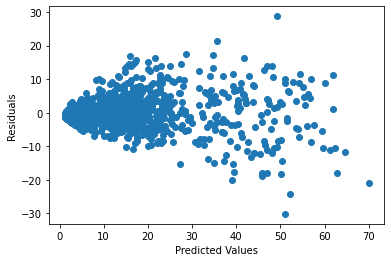

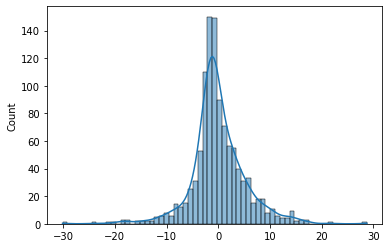

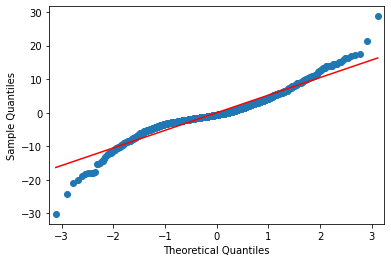

8.316659971257838e-52
   VIF Factor features
0    2.070050    const
1  238.655981       IP
2  238.655981       BF


In [47]:
#comprobando los supuestos

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')

X = data[["IP","BF"]] # variables independientes
y = data["BB"] # variable dependiente

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

plt.scatter(model.predict(), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

sns.histplot(model.resid, kde=True)
plt.show()
sm.qqplot(model.resid, line='s')
plt.show()

_, pval, _, _ = het_breuschpagan(model.resid, X)
print(pval)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

In [54]:
# esto es lo mismo de arriba

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv("2022 MLB Player Stats - Pitching.csv", sep=';')

X = data[["IP","BF"]] # variables independientes
y = data["BB"] # variable dependiente

# Añadir una constante a la matriz de características X
X = sm.add_constant(X)

# Entrenar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Obtener un resumen de la regresión lineal
print(model.summary())

# Comprobar la homocedasticidad utilizando el test de Breusch-Pagan
_, pval, _, _ = het_breuschpagan(model.resid, X)
print('Breusch-Pagan test p-value:', pval)

# Comprobar la multicolinealidad utilizando el factor de inflación de la varianza (VIF)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:                     BB   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     3732.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:18:35   Log-Likelihood:                -3323.7
No. Observations:                1081   AIC:                             6653.
Df Residuals:                    1078   BIC:                             6668.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2546      0.229      5.467      0.0

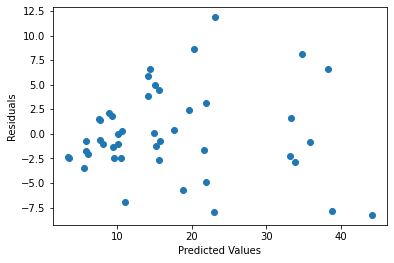

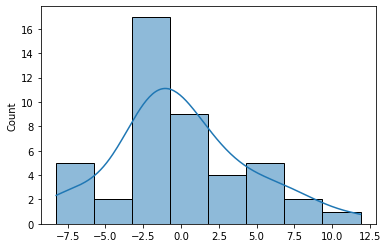

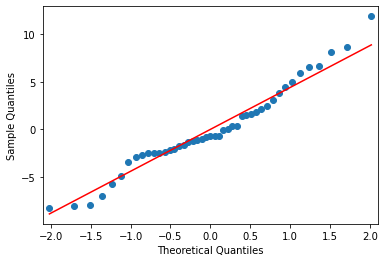

0.018518229700860665
   VIF Factor features
0    3.157469    const
1  679.067499       IP
2  895.739646       BF
3   23.812557        R


In [57]:
# Equipo 'TOT'

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')
# filtrar los elementos por un valor específico en una columna
data = data[data['Tm'] == 'TOT']
data = data[data['Lg'] == 'MLB']


X = data[["IP","BF","R"]] # variables independientes
y = data["BB"] # variable dependiente

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

plt.scatter(model.predict(), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

sns.histplot(model.resid, kde=True)
plt.show()
sm.qqplot(model.resid, line='s')
plt.show()

_, pval, _, _ = het_breuschpagan(model.resid, X)
print(pval)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)




# Ejercicio 2

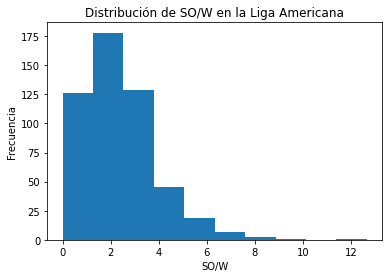

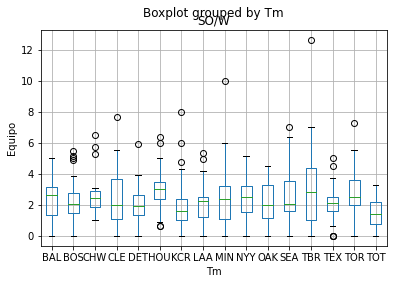

In [68]:
# Equipos de 'AL' 

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV en un dataframe de pandas
data = pd.read_csv("2022 MLB Player Stats - Pitching.csv",sep = ';')

# Filtrar los datos para incluir solamente los de la Liga Americana (AL)
data_AL = data[data['Lg'] == 'AL']

# Crear un histograma de la variable SO/W para todos los equipos de la Liga Americana
plt.hist(data_AL['SO/W'], bins=10)
plt.xlabel('SO/W')
plt.ylabel('Frecuencia')
plt.title('Distribución de SO/W en la Liga Americana')
plt.show()

# Crear una caja de bigotes para la variable SO/W por equipo en la Liga Americana
data_AL.boxplot(column='SO/W', by='Tm', vert=True)
#plt.xlabel('SO/W')
plt.ylabel('Equipo')
#plt.title('Distribución de SO/W por equipo en la Liga Americana')
plt.show()